# 1.2. Getting started with exploratory data analysis in the Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [3]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

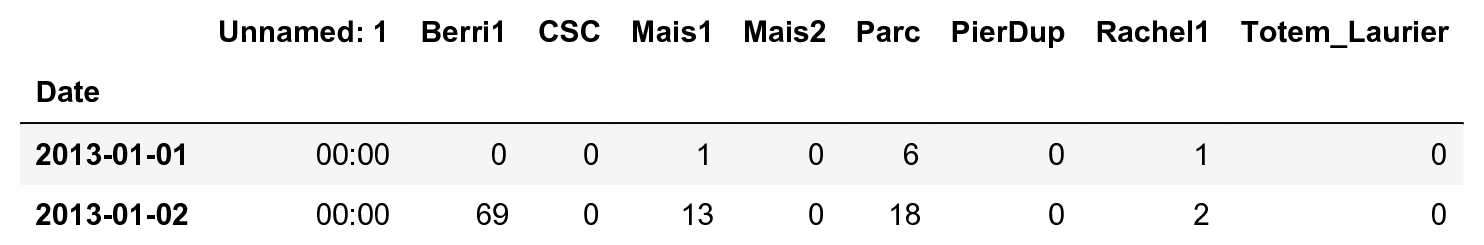

In [4]:
df.head(2)

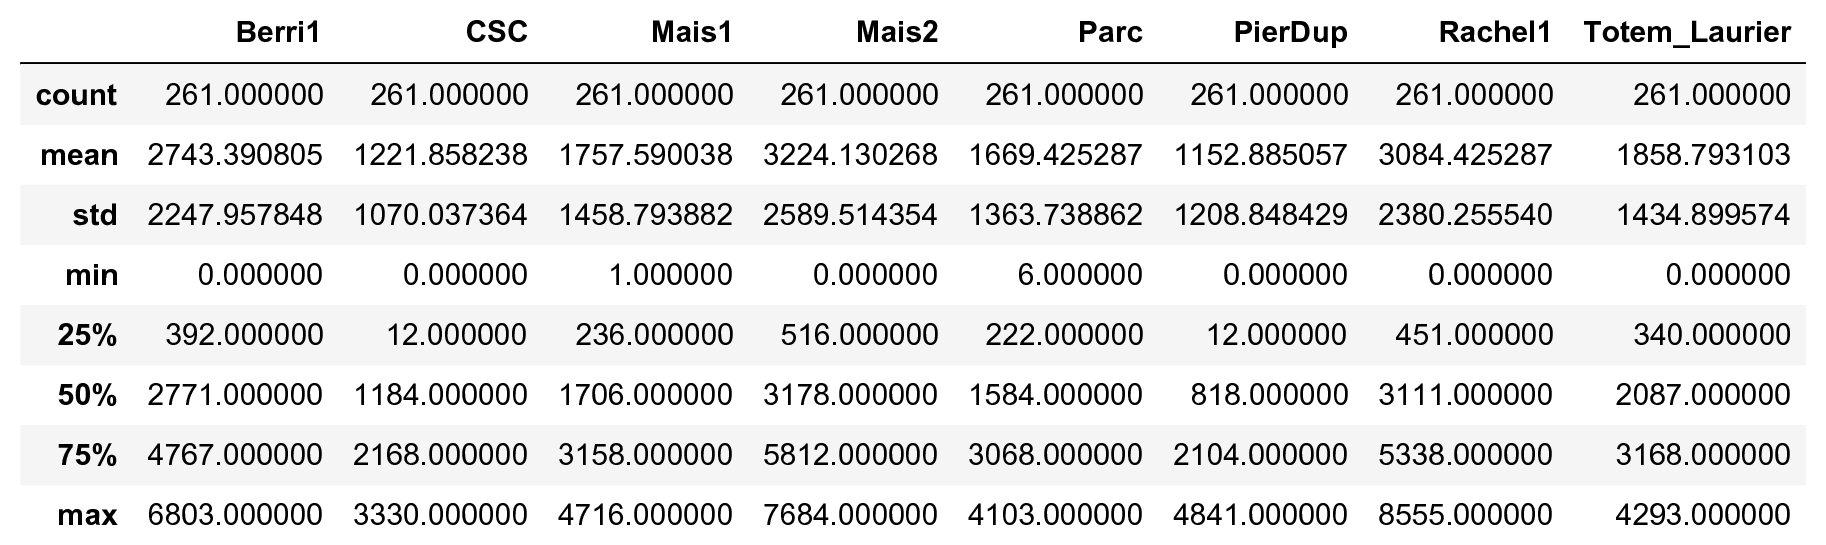

In [5]:
df.describe()

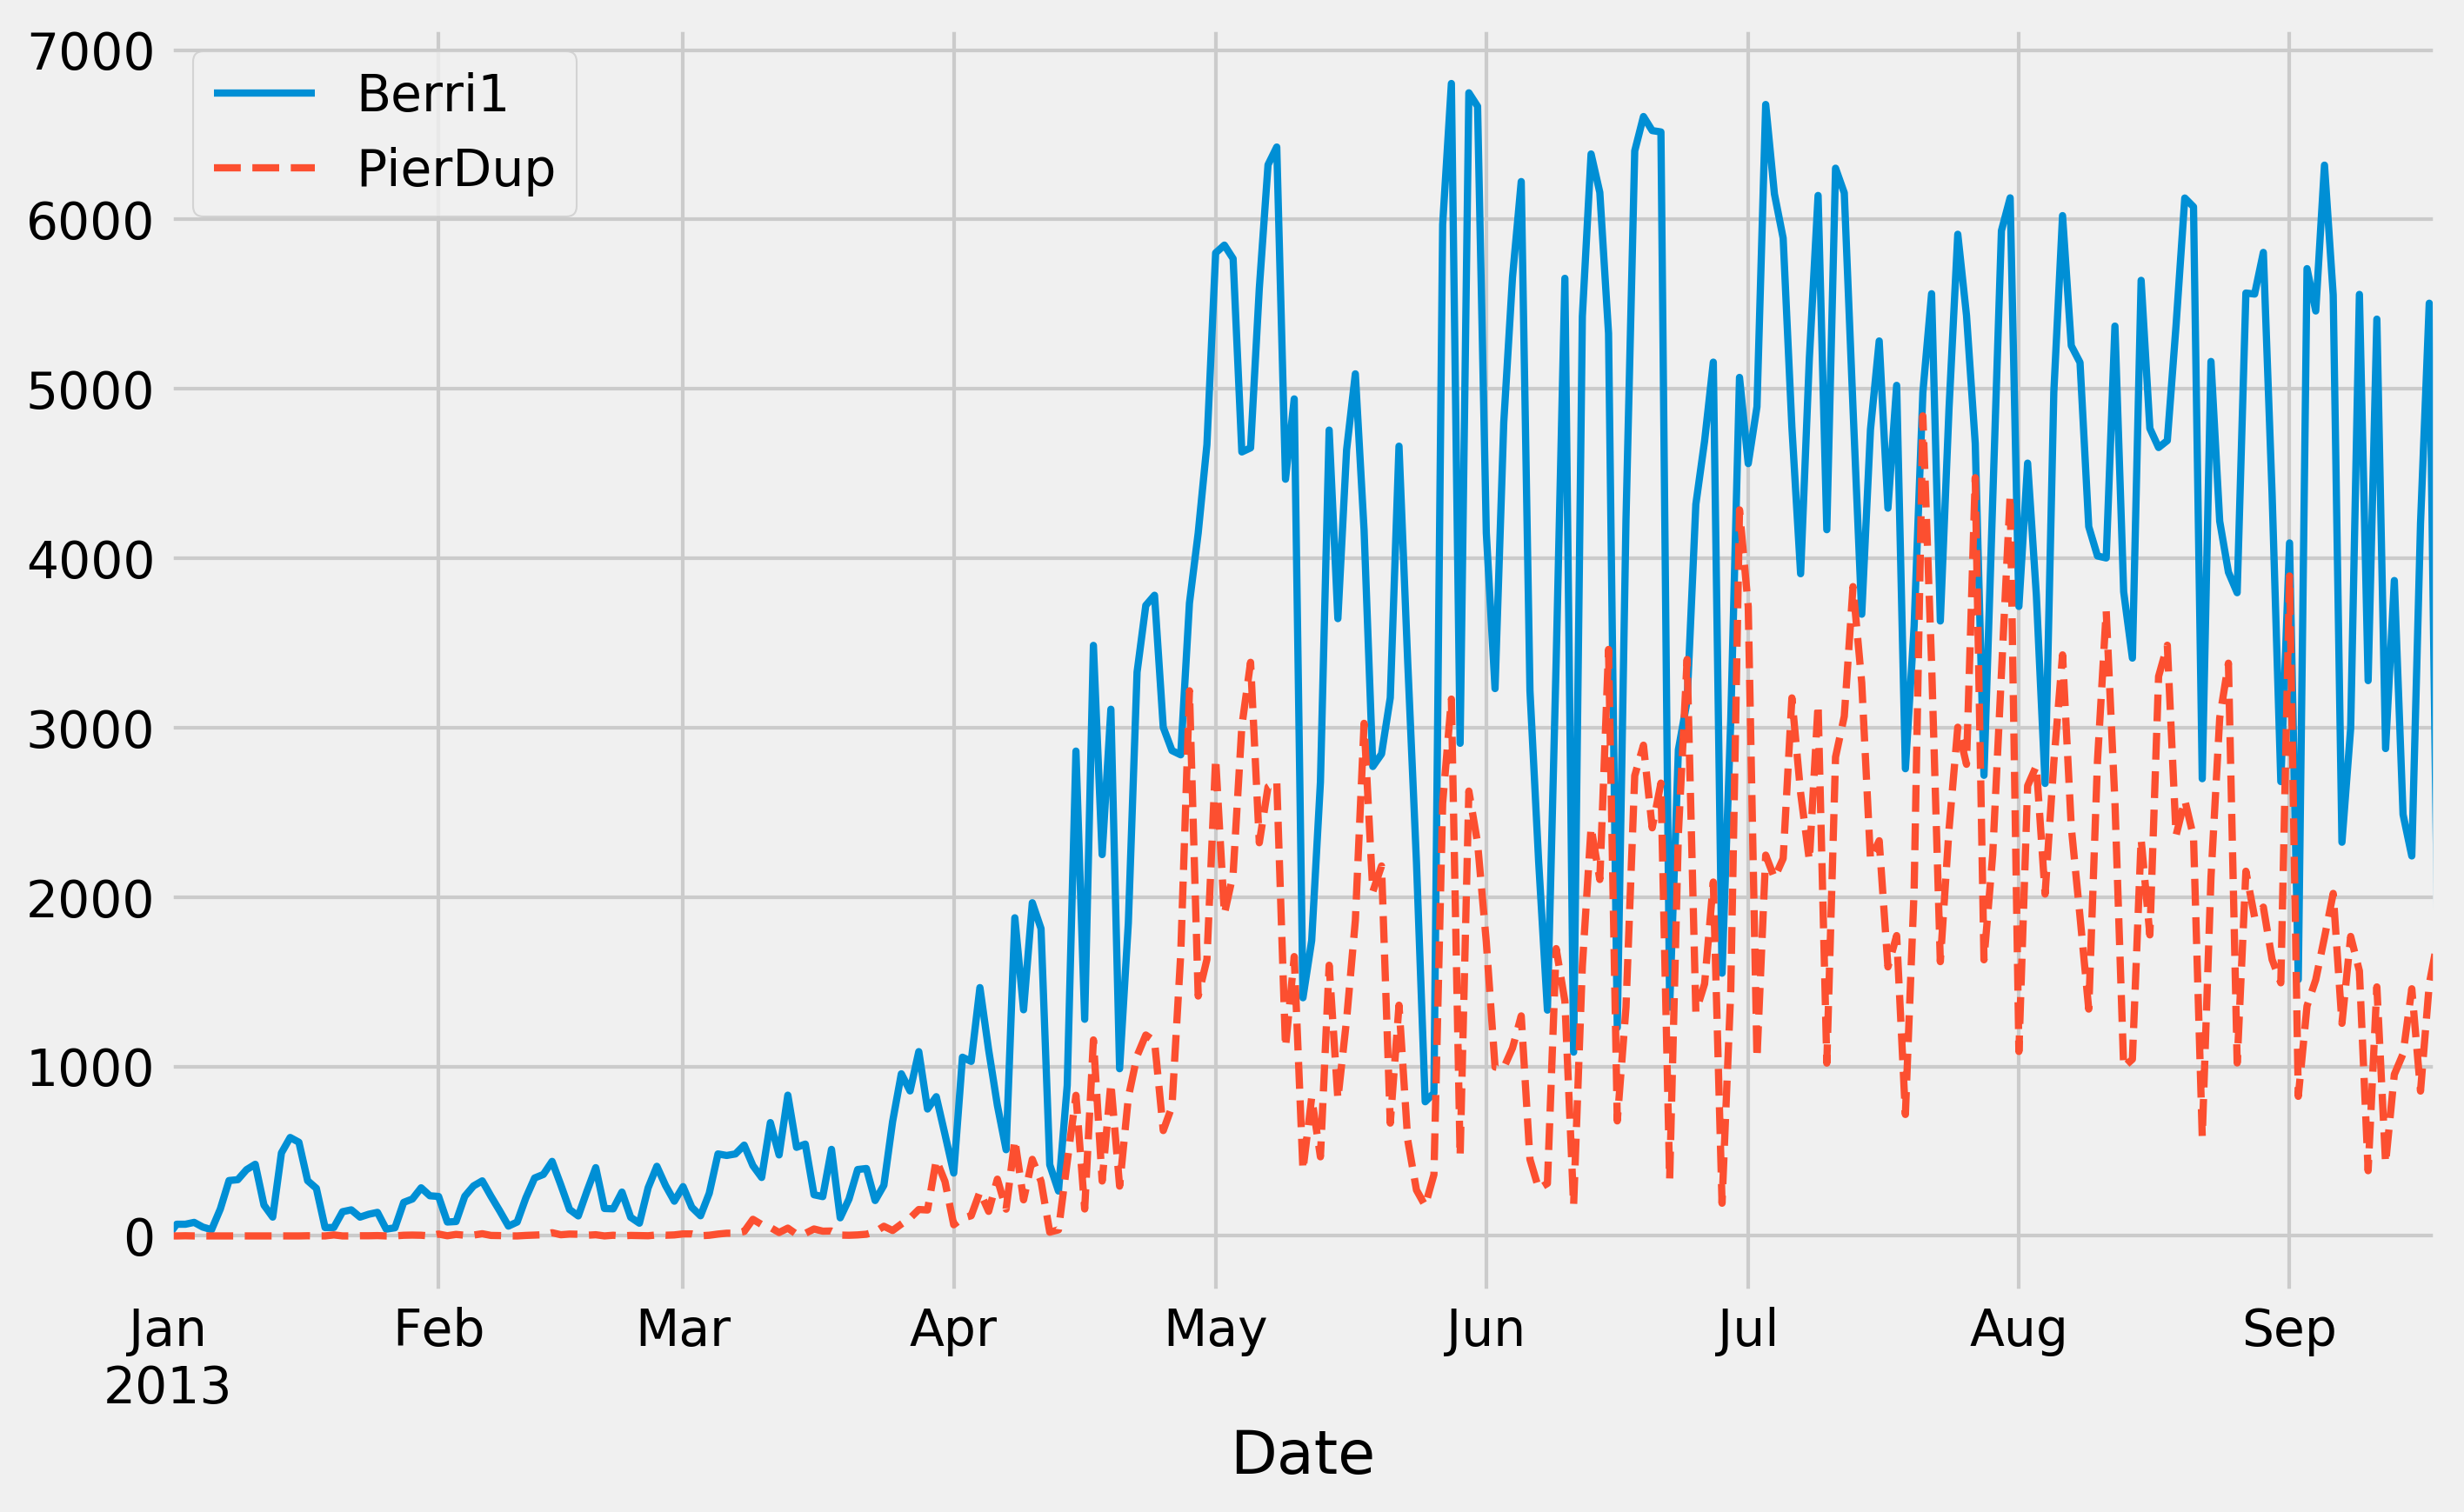

In [6]:
df[['Berri1', 'PierDup']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

In [7]:
df.index.weekday_name

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

In [8]:
df_week = df.groupby(df.index.weekday).sum()

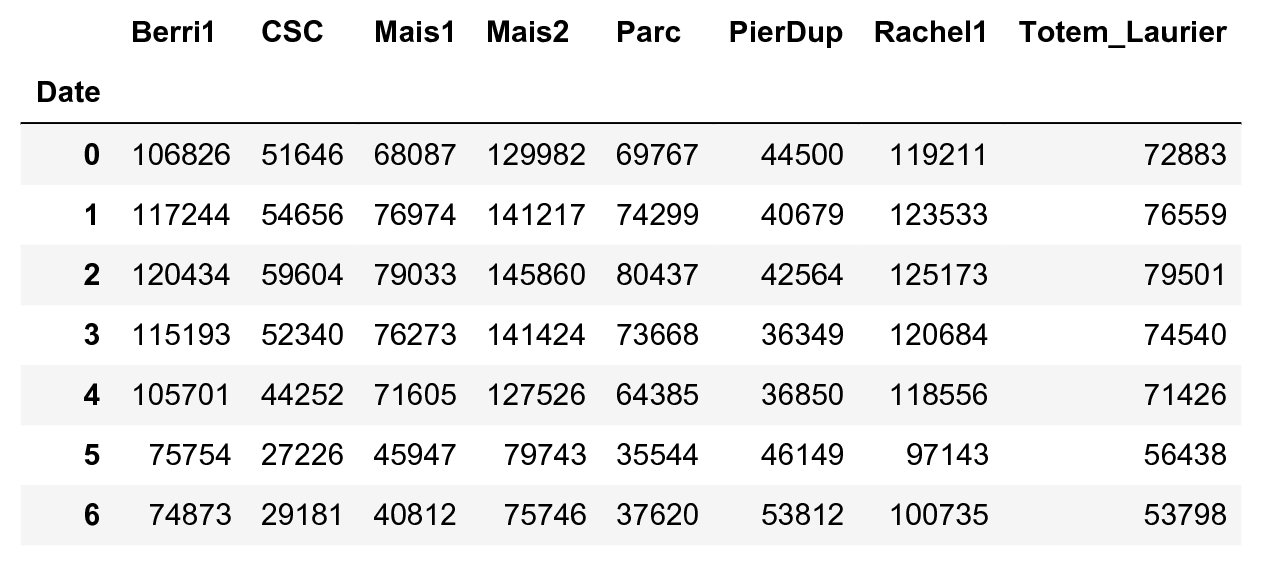

In [9]:
df_week

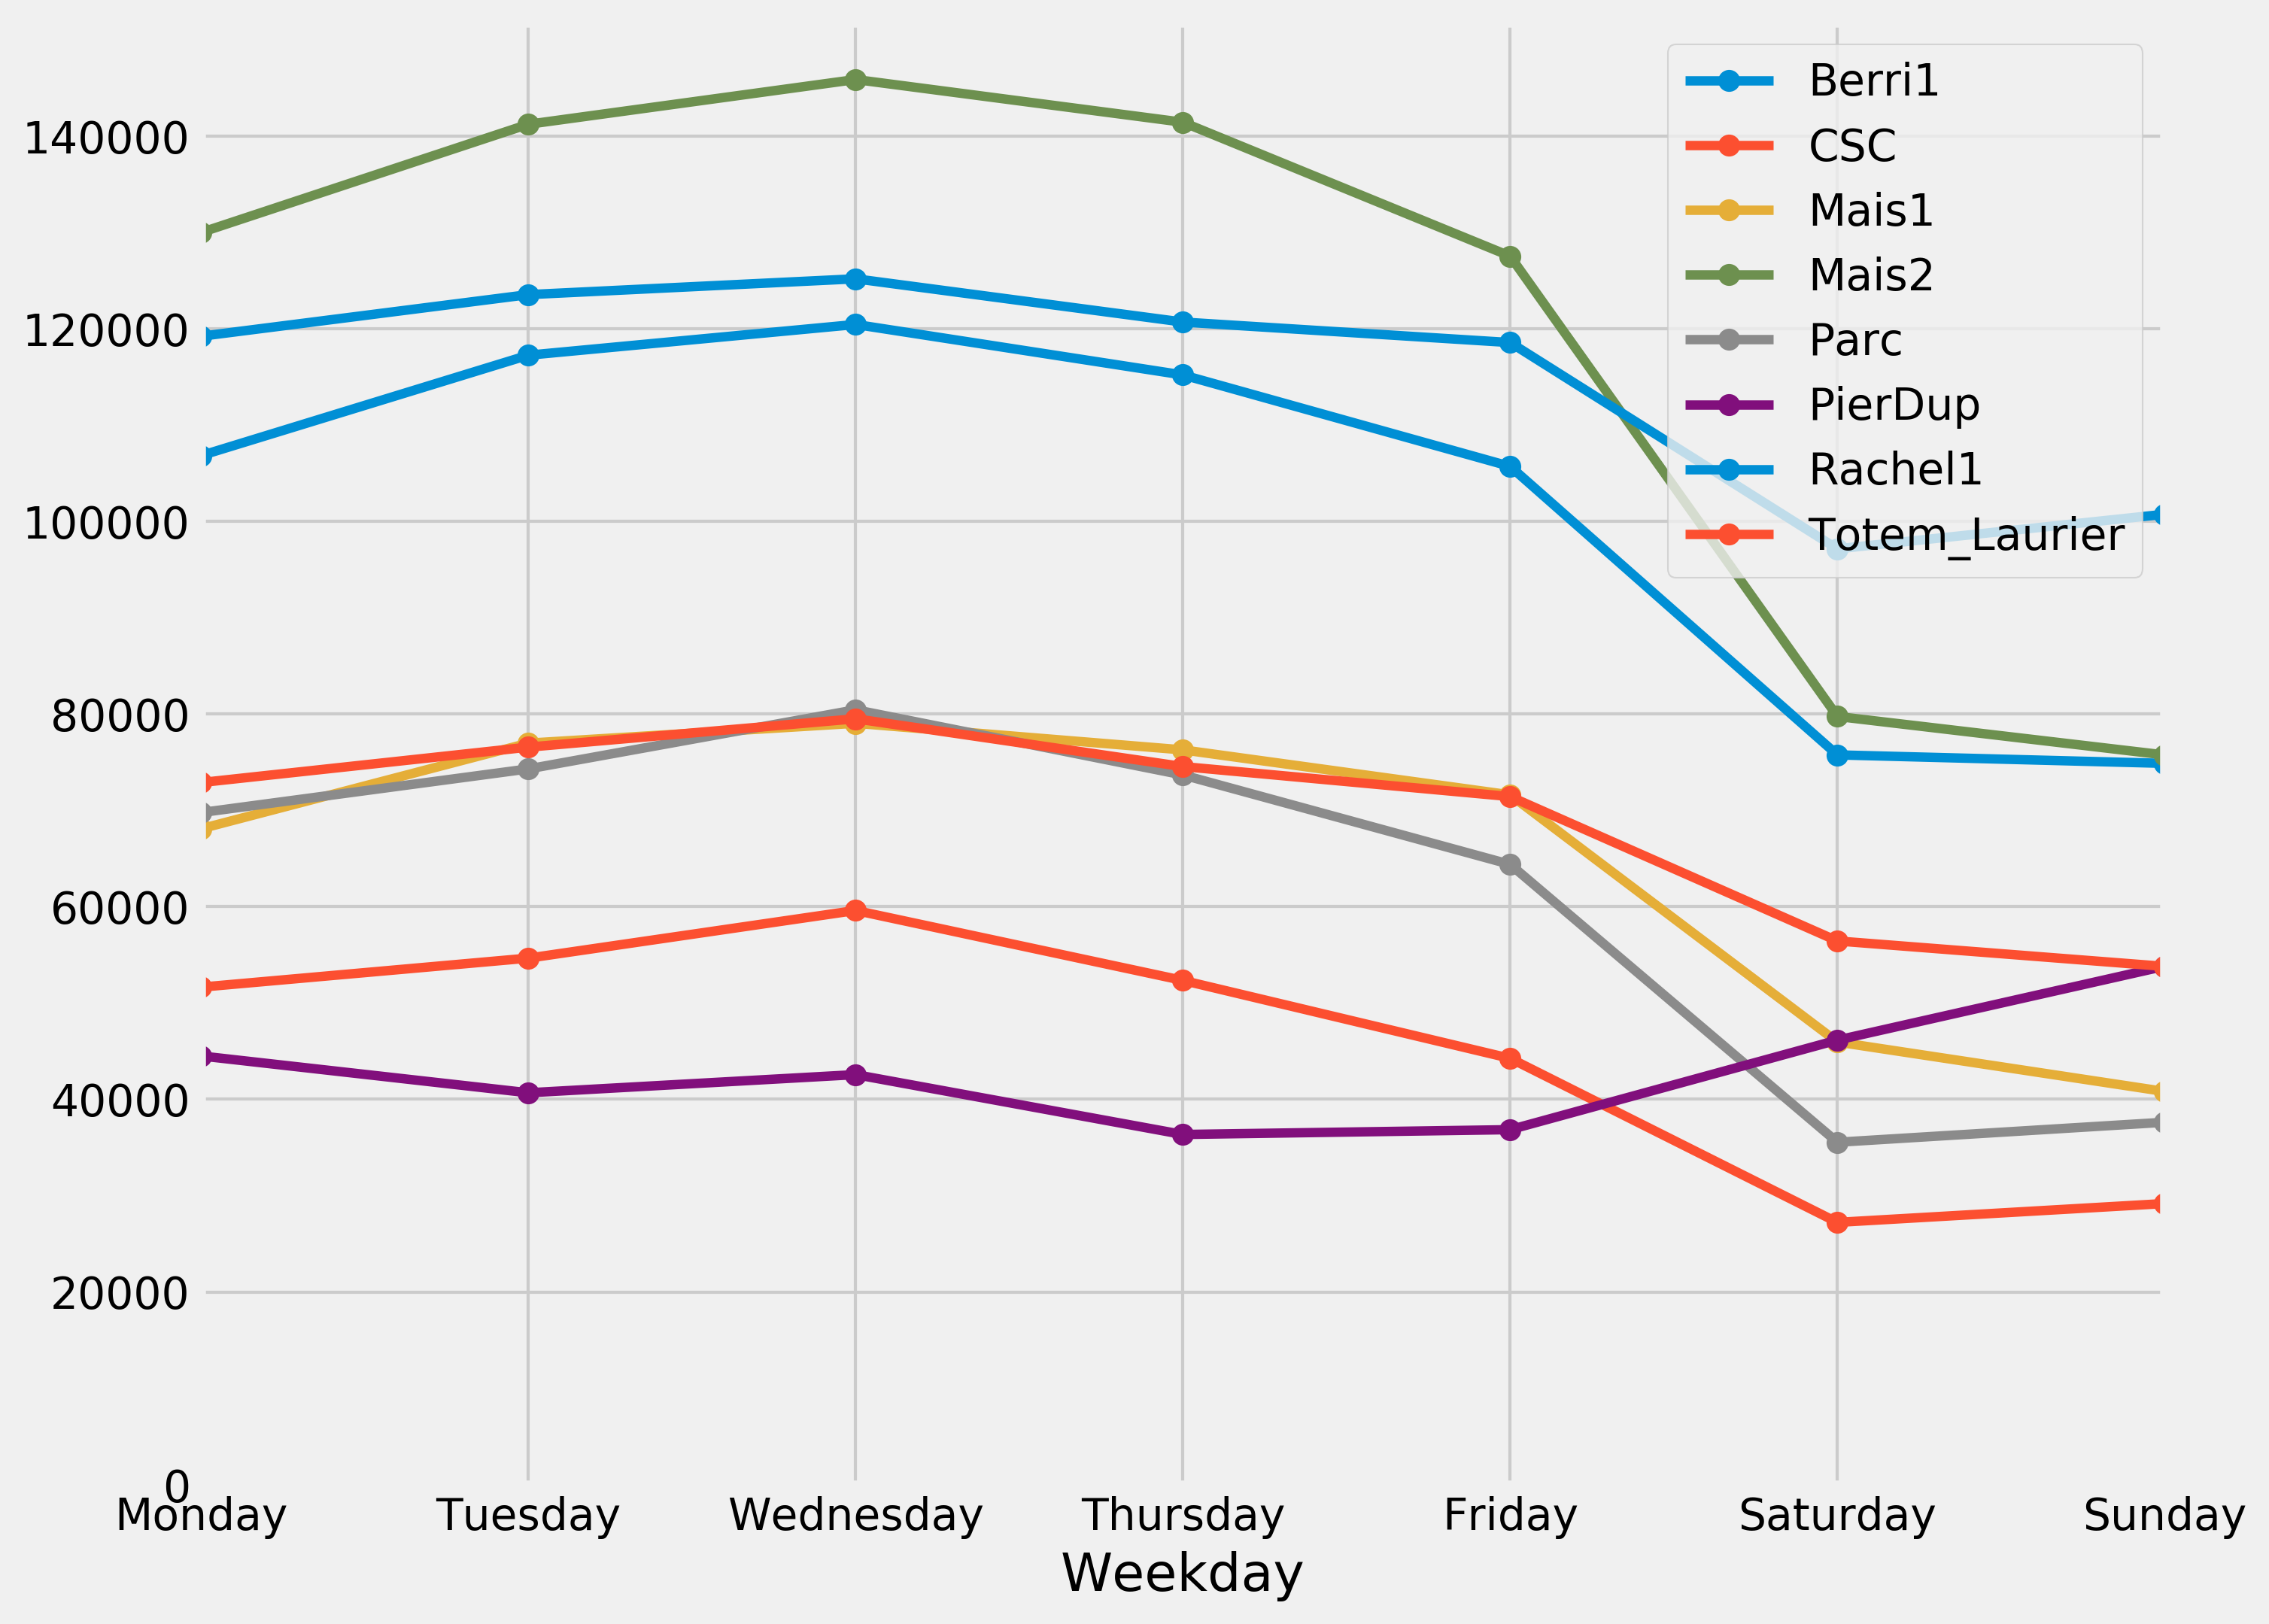

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(
    ('Monday,Tuesday,Wednesday,Thursday,'
     'Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

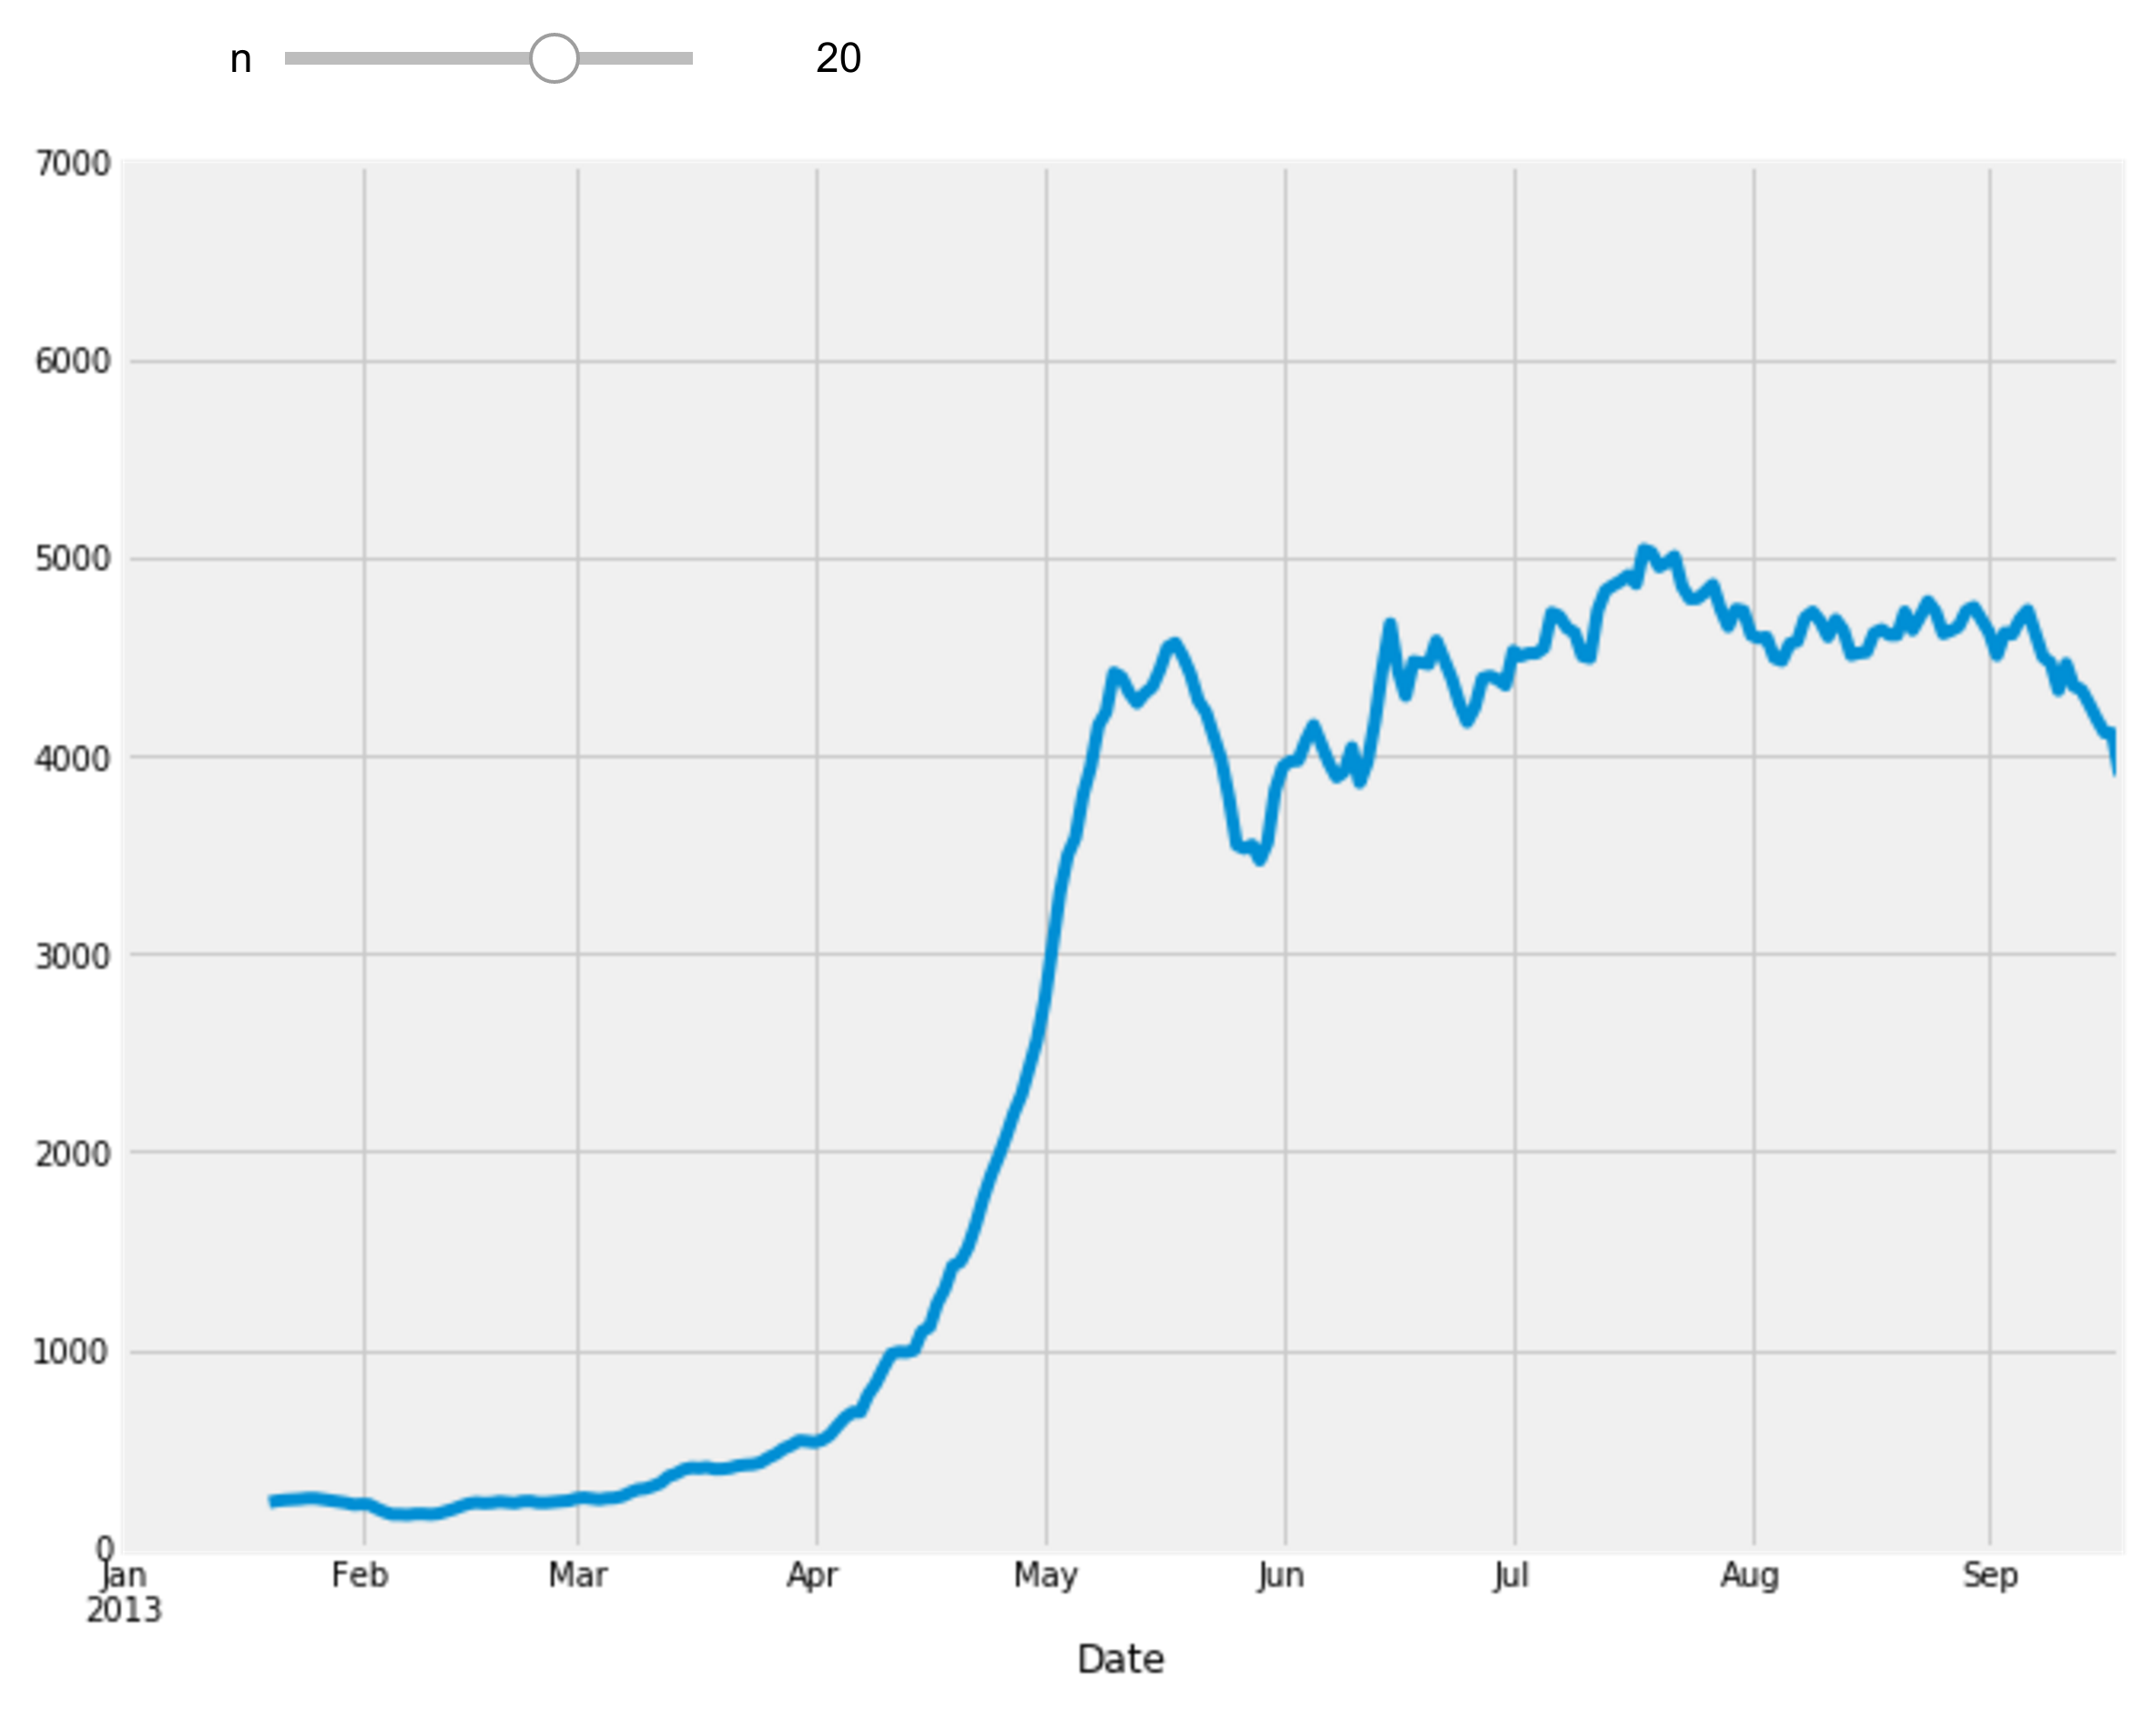

In [11]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()